In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data for all 5 cities

In [ ]:
beijing=pd.read_csv('BeijingPM20100101_20151231.csv')
chengdu=pd.read_csv('ChengduPM20100101_20151231.csv')
guangzhou=pd.read_csv('GuangzhouPM20100101_20151231.csv')
shanghai=pd.read_csv('ShanghaiPM20100101_20151231.csv')
shenyang=pd.read_csv('ShenyangPM20100101_20151231.csv')


#### Adding an extra column for city name so that it will help if we merge all data into a single dataframe

In [ ]:
beijing['city']=['beijing' for i in range(beijing.shape[0])]
chengdu['city']=['chengdu' for i in range(chengdu.shape[0])]
guangzhou['city']=['guangzhou' for i in range(guangzhou.shape[0])]
shanghai['city']=['shanghai' for i in range(shanghai.shape[0])]
shenyang['city']=['shenyang' for i in range(shenyang.shape[0])]
data=[beijing,chengdu,guangzhou,shanghai,shenyang]

### 1 Beijing

In [ ]:
beijing.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0,beijing
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0,beijing
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0,beijing
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0,beijing
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0,beijing


In [ ]:
beijing.tail()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0,beijing
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0,beijing
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0,beijing
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0,beijing
52583,52584,2015,12,31,23,4,NaN,NaN,NaN,235.0,-9.0,79.0,1029.0,-6.0,NE,2.67,0.0,0.0,beijing


#### So here we have data for PM2.5 concentration along with other features like Dew point,Humidity,Temperarue ,Wind speed etc
#### The data is colleted over a period of 2010 - 2015 , for each hour each day.
#### The PM2.5 concentration data has been recorded by different sites but we need data from only one site , so we can compare them and chose one

Text(0.5, 1.0, 'Distribution of PM2.5 values from different sites')

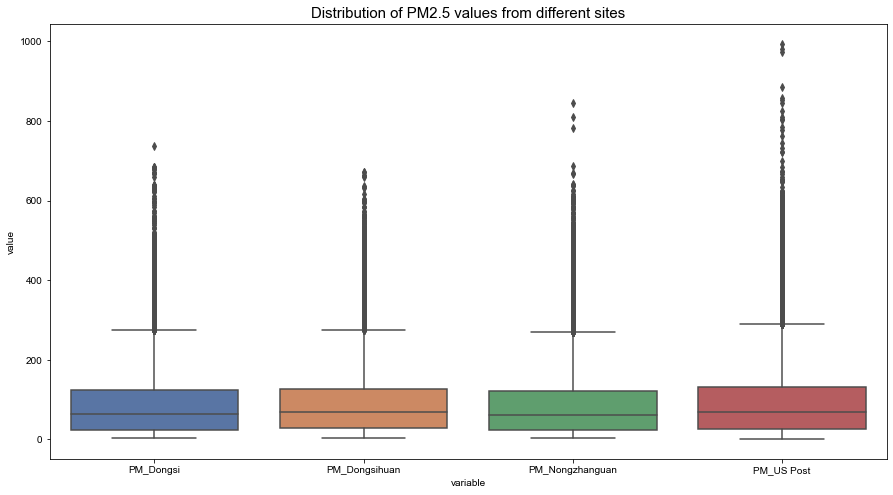

In [ ]:
plt.subplots(figsize=(15,8))
sns.set(style='darkgrid')
sns.boxplot(x='variable',y='value',data=pd.melt(beijing[['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post']]))
plt.title('Distribution of PM2.5 values from different sites',fontsize=15)

#### The values are almost in the same range so lets chose the one with least null values

In [ ]:
beijing[['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post']].isna().sum()

PM_Dongsi          27532
PM_Dongsihuan      32076
PM_Nongzhanguan    27653
PM_US Post          2197
dtype: int64

#### Clearly the reading from us post has the least number of null values.
#### Selecting the us post for pm level and dropping the others.

In [ ]:
beijing.drop(['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan'],inplace=True,axis=1)

The year , month,  day and hour columns can be converted to single time column.

In [ ]:
import datetime
beijing['time'] = beijing.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)

In [ ]:
beijing.head()

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city,time
0,1,2010,1,1,0,4,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0,beijing,2010-01-01 00:00:00
1,2,2010,1,1,1,4,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0,beijing,2010-01-01 01:00:00
2,3,2010,1,1,2,4,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0,beijing,2010-01-01 02:00:00
3,4,2010,1,1,3,4,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0,beijing,2010-01-01 03:00:00
4,5,2010,1,1,4,4,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0,beijing,2010-01-01 04:00:00


#### Applying the same steps for each city

### 2 Chengdu

In [ ]:
chengdu.head()

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city
0,1,2010,1,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0,chengdu
1,2,2010,1,1,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0,chengdu
2,3,2010,1,1,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0,chengdu
3,4,2010,1,1,3,4,NaN,NaN,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0,chengdu
4,5,2010,1,1,4,4,NaN,NaN,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0,chengdu


In [ ]:
chengdu[['PM_Caotangsi','PM_Shahepu','PM_US Post']].isna().sum()

PM_Caotangsi    28164
PM_Shahepu      27990
PM_US Post      23684
dtype: int64

In [ ]:
chengdu.drop(['PM_Caotangsi','PM_Shahepu'],axis=1,inplace=True)

In [ ]:
chengdu['Time']=chengdu.apply(lambda x:datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Guangzhou

In [ ]:
guangzhou.head()

,No,year,month,day,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city
0,1,2010,1,1,0,4.0,NaN,NaN,NaN,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0,guangzhou
1,2,2010,1,1,1,4.0,NaN,NaN,NaN,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0,guangzhou
2,3,2010,1,1,2,4.0,NaN,NaN,NaN,10.4,87.0,1015.0,12.5,NW,0.6,0.3,0.3,guangzhou
3,4,2010,1,1,3,4.0,NaN,NaN,NaN,10.2,89.0,1014.9,12.0,NW,1.4,0.6,0.9,guangzhou
4,5,2010,1,1,4,4.0,NaN,NaN,NaN,10.4,91.0,1014.6,11.8,NE,0.6,0.7,1.6,guangzhou


In [ ]:
guangzhou[['PM_City Station','PM_5th Middle School','PM_US Post']].isna().sum()

PM_City Station         20232
PM_5th Middle School    31489
PM_US Post              20232
dtype: int64

In [ ]:
guangzhou.drop(['PM_City Station','PM_5th Middle School'],axis=1,inplace=True)

In [ ]:
guangzhou['Time']=guangzhou.apply(lambda x:datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']) ,axis=1)

#### Shanghai

In [ ]:
shanghai.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0,shanghai
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0,shanghai
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0,shanghai
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0,shanghai
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0,shanghai


In [ ]:
shanghai[['PM_Jingan','PM_US Post','PM_Xuhui']].isna().sum()

PM_Jingan     27884
PM_US Post    18545
PM_Xuhui      27395
dtype: int64

In [ ]:
shanghai.drop(['PM_Jingan','PM_Xuhui'],axis=1,inplace=True)

In [ ]:
shanghai['Time']=shanghai.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']),axis=1)

### Shenyang

In [ ]:
shenyang.head()

,No,year,month,day,hour,season,PM_Taiyuanjie,PM_US Post,PM_Xiaoheyan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city
0,1,2010,1,1,0,4,NaN,NaN,NaN,-26.0,69.79,1024.0,-22.0,NE,1.0289,NaN,NaN,shenyang
1,2,2010,1,1,1,4,NaN,NaN,NaN,-26.0,76.26,1024.0,-23.0,NE,2.5722,NaN,NaN,shenyang
2,3,2010,1,1,2,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,5.1444,NaN,NaN,shenyang
3,4,2010,1,1,3,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,7.7166,NaN,NaN,shenyang
4,5,2010,1,1,4,4,NaN,NaN,NaN,-27.0,69.56,1022.0,-23.0,NE,9.7744,NaN,NaN,shenyang


In [ ]:
shenyang[['PM_Taiyuanjie','PM_US Post','PM_Xiaoheyan']].isna().sum()

PM_Taiyuanjie    28196
PM_US Post       30904
PM_Xiaoheyan     27957
dtype: int64

#### Since we have taken US Post reading for each city lets consifder it for shenyang as well

In [ ]:
shenyang.drop(['PM_Taiyuanjie','PM_Xiaoheyan'],axis=1,inplace=True)

In [ ]:
shenyang['Time']=shenyang.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']),axis=1)

In [ ]:
shenyang.head()

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city,Time
0,1,2010,1,1,0,4,NaN,-26.0,69.79,1024.0,-22.0,NE,1.0289,NaN,NaN,shenyang,2010-01-01 00:00:00
1,2,2010,1,1,1,4,NaN,-26.0,76.26,1024.0,-23.0,NE,2.5722,NaN,NaN,shenyang,2010-01-01 01:00:00
2,3,2010,1,1,2,4,NaN,-27.0,69.56,1023.0,-23.0,NE,5.1444,NaN,NaN,shenyang,2010-01-01 02:00:00
3,4,2010,1,1,3,4,NaN,-27.0,69.56,1023.0,-23.0,NE,7.7166,NaN,NaN,shenyang,2010-01-01 03:00:00
4,5,2010,1,1,4,4,NaN,-27.0,69.56,1022.0,-23.0,NE,9.7744,NaN,NaN,shenyang,2010-01-01 04:00:00


#### There is a possibility that data from earlier years might have most of the missing values. Lets visualisze that to get a pattern for missing values

Text(0.5, 0.98, "No. of missing values from each year's data for each city")

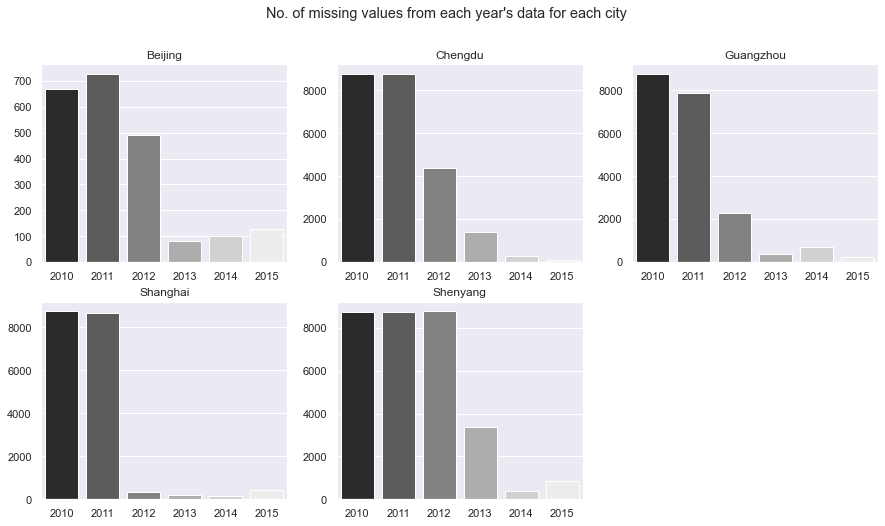

In [ ]:
year=[2010,2011,2012,2013,2014,2015]
cities=['Beijing','Chengdu','Guangzhou','Shanghai','Shenyang']
fig=plt.figure(figsize=(15,8))
for i in range(5):
    l=[]
    for j in year:
        l.append(data[i][data[i]['year']==j]['PM_US Post'].isna().sum())
    ax=plt.subplot(2,3,i+1)
    sns.barplot(year,l,palette='Greys_r')
    ax.set_title(cities[i])
fig.suptitle("No. of missing values from each year's data for each city")

#### From the figure above it is clear that most of the missing are from the first three years so we can remove that data as it is inconsistent

In [ ]:
beijing=beijing[beijing['year']>2012]
chengdu=chengdu[chengdu['year']>2012]
guangzhou=guangzhou[guangzhou['year']>2012]
shanghai=shanghai[shanghai['year']>2012]
shenyang=shenyang[shenyang['year']>2012]


In [ ]:
guangzhou.head()

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city,Time
26304,26305,2013,1,1,0,4.0,83.0,3.7,91.0,1014.2,5.0,NW,1.9,0.0,0.0,guangzhou,2013-01-01 00:00:00
26305,26306,2013,1,1,1,4.0,95.0,4.2,88.0,1014.2,6.0,NW,3.4,0.0,0.0,guangzhou,2013-01-01 01:00:00
26306,26307,2013,1,1,2,4.0,94.0,4.3,84.0,1014.0,6.8,NW,5.0,0.0,0.0,guangzhou,2013-01-01 02:00:00
26307,26308,2013,1,1,3,4.0,55.0,3.5,76.0,1013.9,7.5,NW,5.8,0.0,0.0,guangzhou,2013-01-01 03:00:00
26308,26309,2013,1,1,4,4.0,60.0,2.7,69.0,1013.9,8.0,NW,8.2,0.0,0.0,guangzhou,2013-01-01 04:00:00


In [ ]:
beijing.index = beijing.time

In [ ]:
beijing.head()

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city,time,EMA,SMA
time,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,26305,2013,1,1,0,4,31.0,-10.0,67.0,1018.0,-5.0,NW,5.81,0.0,0.0,beijing,2013-01-01 00:00:00,31.00,NaN
2013-01-01 01:00:00,26306,2013,1,1,1,4,32.0,-11.0,73.0,1017.0,-7.0,NW,9.83,0.0,0.0,beijing,2013-01-01 01:00:00,31.52,NaN
2013-01-01 02:00:00,26307,2013,1,1,2,4,21.0,-11.0,73.0,1017.0,-7.0,NW,11.62,0.0,0.0,beijing,2013-01-01 02:00:00,27.77,NaN
2013-01-01 03:00:00,26308,2013,1,1,3,4,16.0,-14.0,72.0,1018.0,-10.0,NW,14.75,0.0,0.0,beijing,2013-01-01 03:00:00,24.53,NaN
2013-01-01 04:00:00,26309,2013,1,1,4,4,15.0,-15.0,66.0,1018.0,-10.0,cv,0.45,0.0,0.0,beijing,2013-01-01 04:00:00,22.36,NaN


In [ ]:
shenyang.index = shenyang.Time
guangzhou.index = shenyang.Time
shanghai.index = shanghai.Time
chengdu.index = chengdu.Time

### Plotting the trend for PM levels 

#### We can observe that all the cities have the similar trend for PM vlaues and also Guangzhou has less PM level in comparison of others

### PM level is highest during the starting and end of each year for all the cities.

Text(0.5, 0.98, 'Effect of humidity on PM Level')

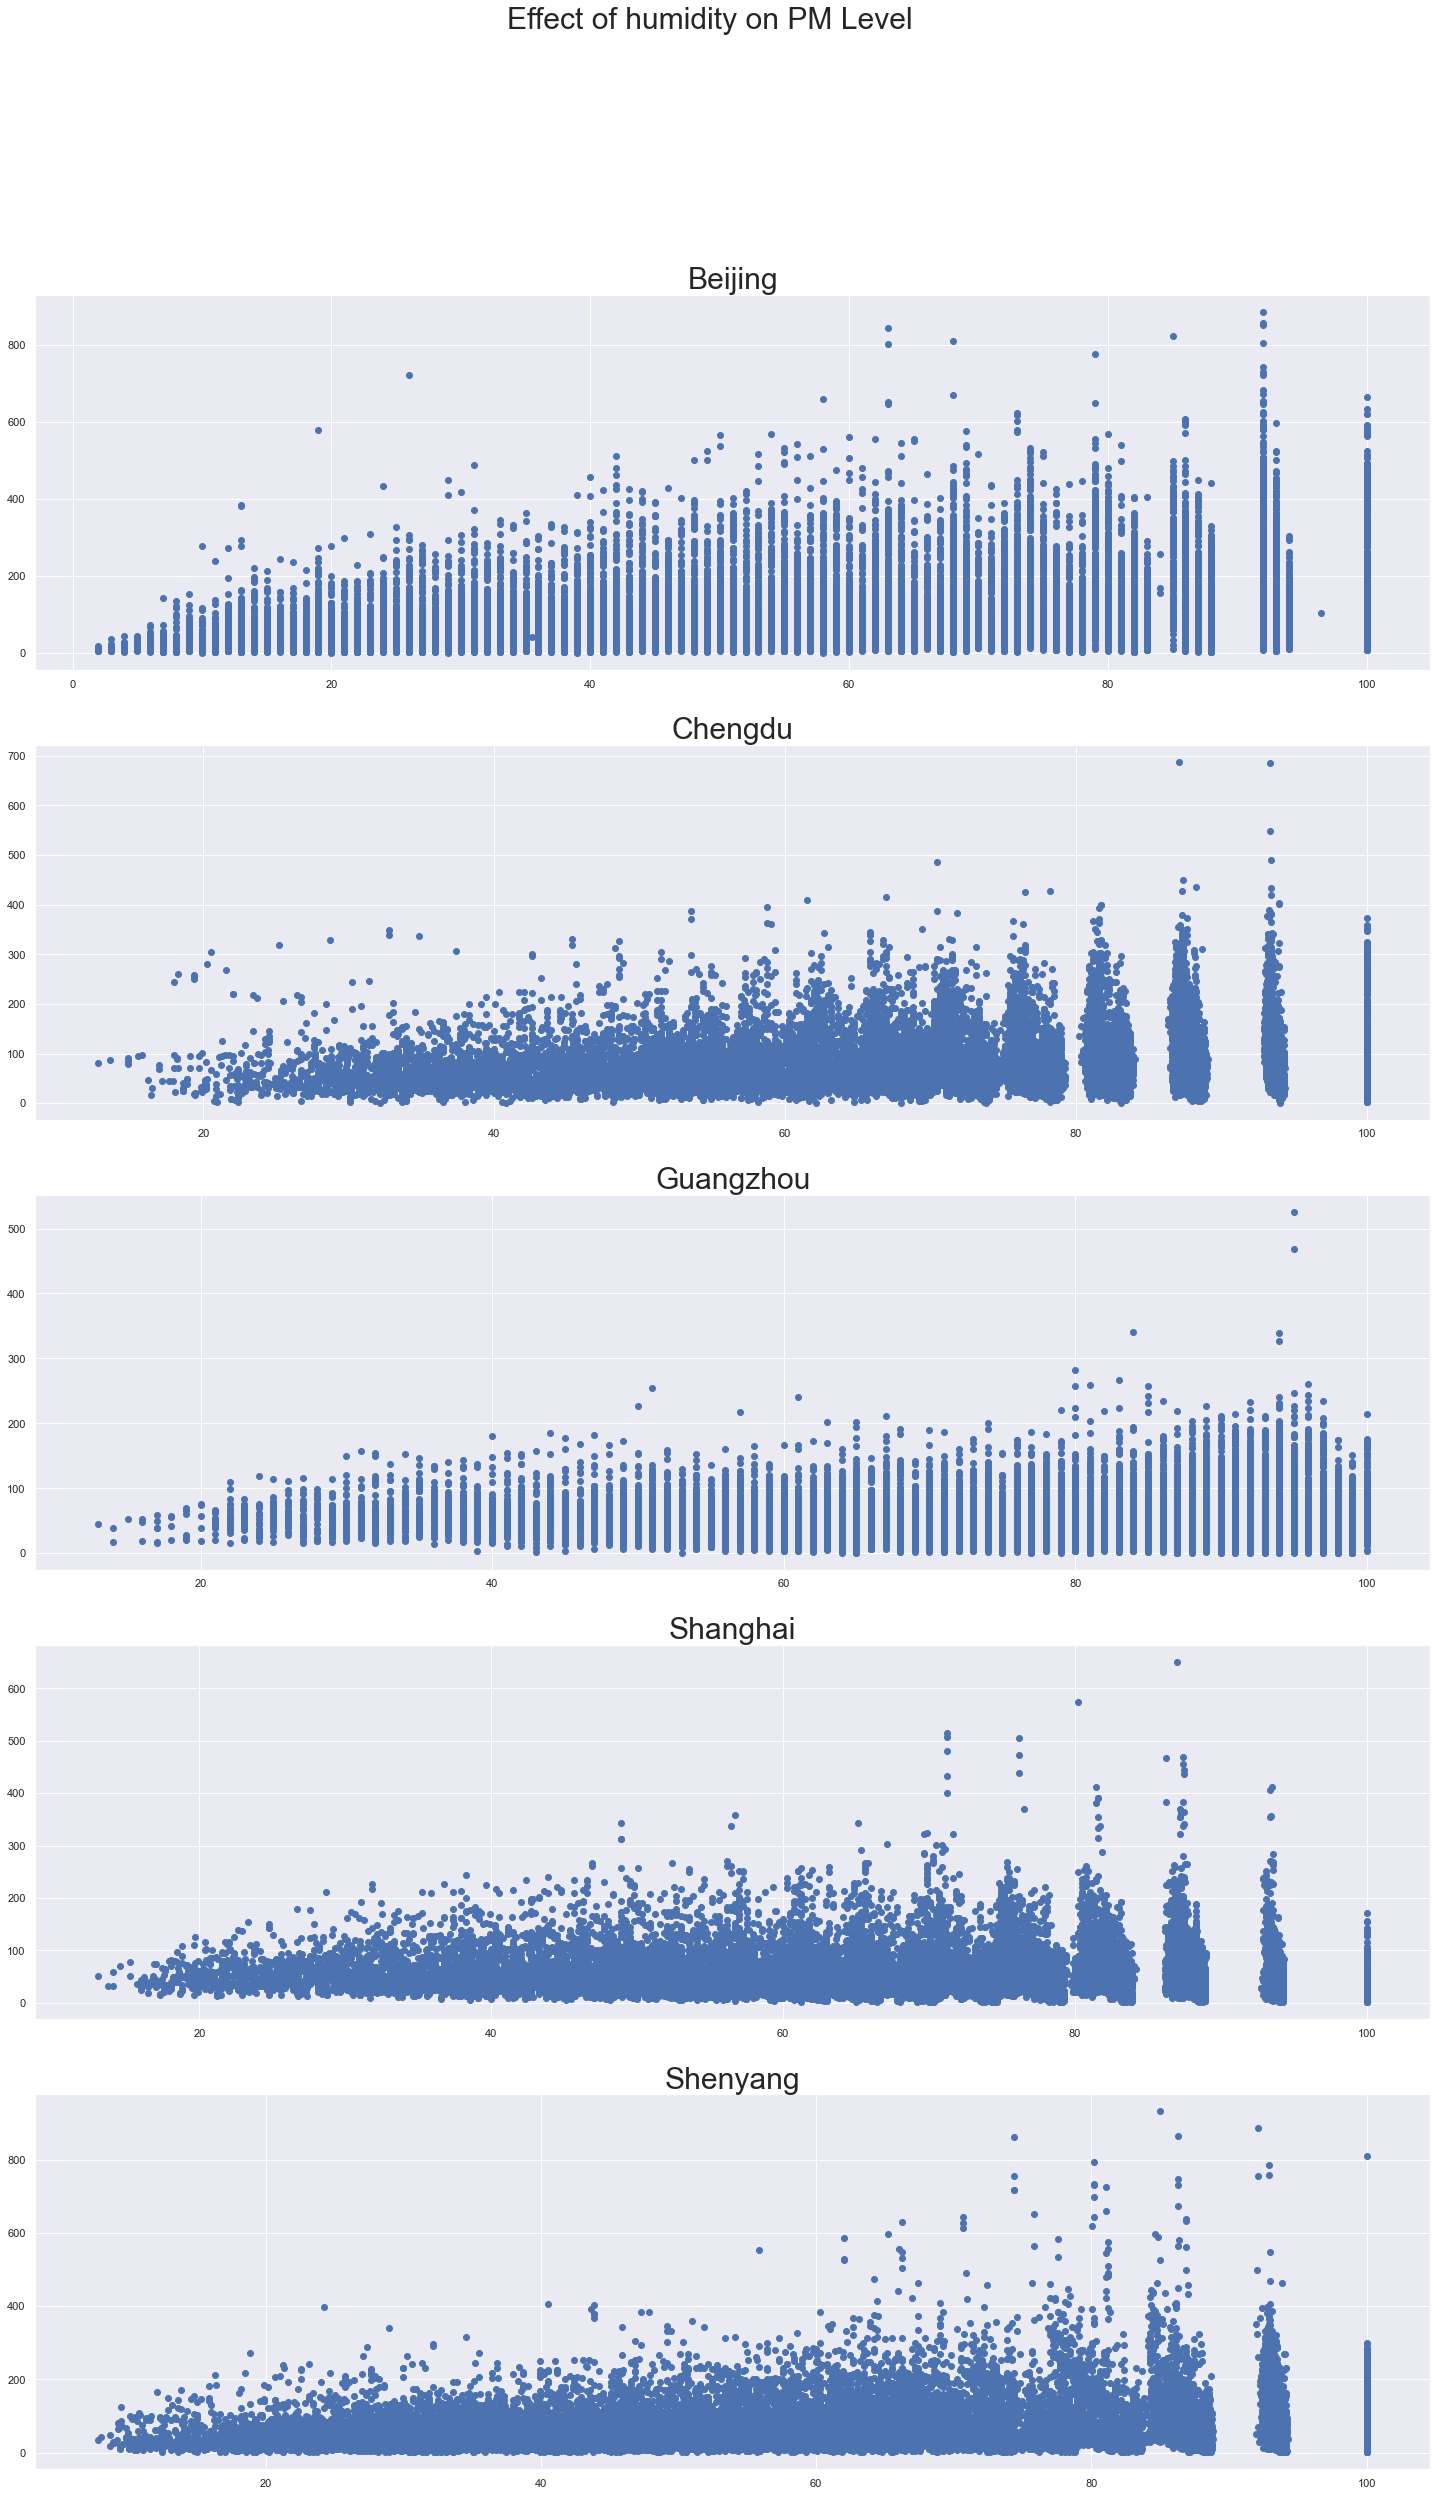

In [ ]:
data=[beijing,chengdu,guangzhou,shanghai,shenyang]
fig=plt.figure(figsize=[25,40])
for j,i in enumerate(data):
    ax=plt.subplot(5,1,j+1)
    plt.scatter(i[i['HUMI']>0]['HUMI'],i[i['HUMI']>0]['PM_US Post'])
    ax.set_title(cities[j],fontsize=(30))
fig.suptitle('Effect of humidity on PM Level',fontsize=30)

### We can observe that at lower humidity levels the PM value is also lower

Text(0.5, 0.98, 'Effect of PREIPITATION on PM Level')

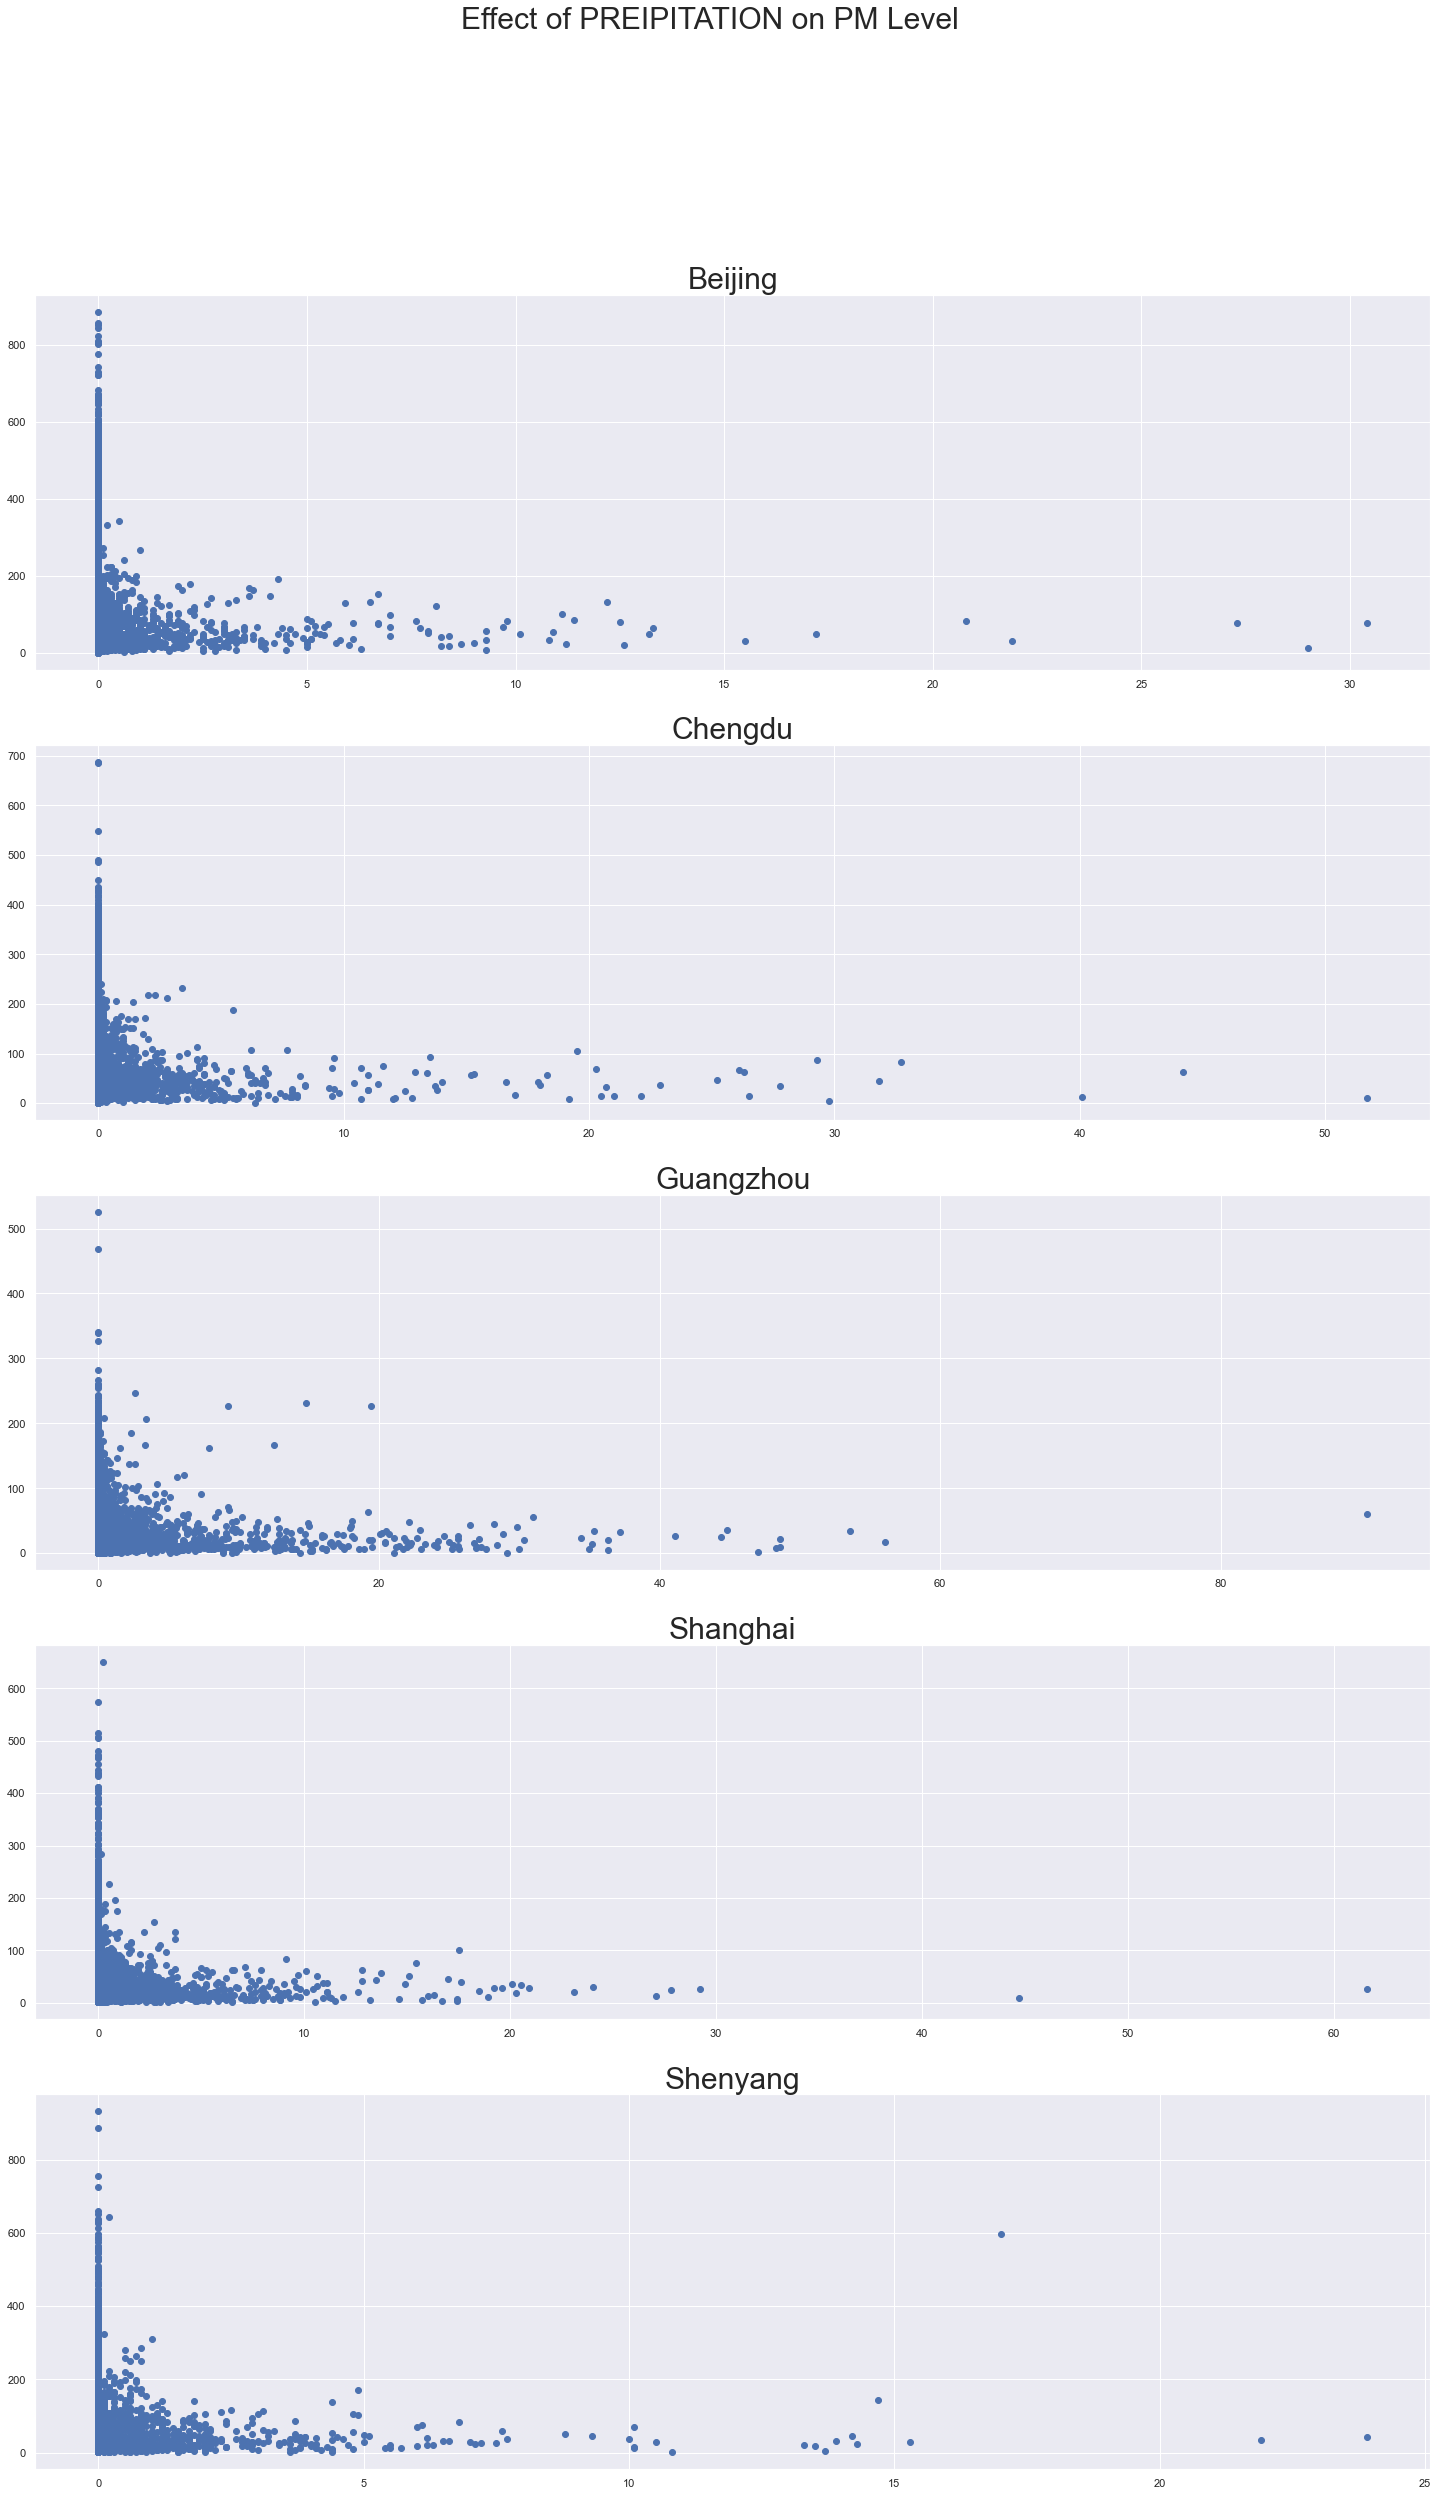

In [ ]:
data=[beijing,chengdu,guangzhou,shanghai,shenyang]
fig=plt.figure(figsize=[25,40])
for j,i in enumerate(data):
    ax=plt.subplot(5,1,j+1)
    plt.scatter(i[i['HUMI']>0]['precipitation'],i[i['HUMI']>0]['PM_US Post'])
    ax.set_title(cities[j],fontsize=(30))
fig.suptitle('Effect of PREIPITATION on PM Level',fontsize=30)

### Clearly we can observe that PM level decreases when its raining

Text(0.5, 0.98, 'PM value distribution')

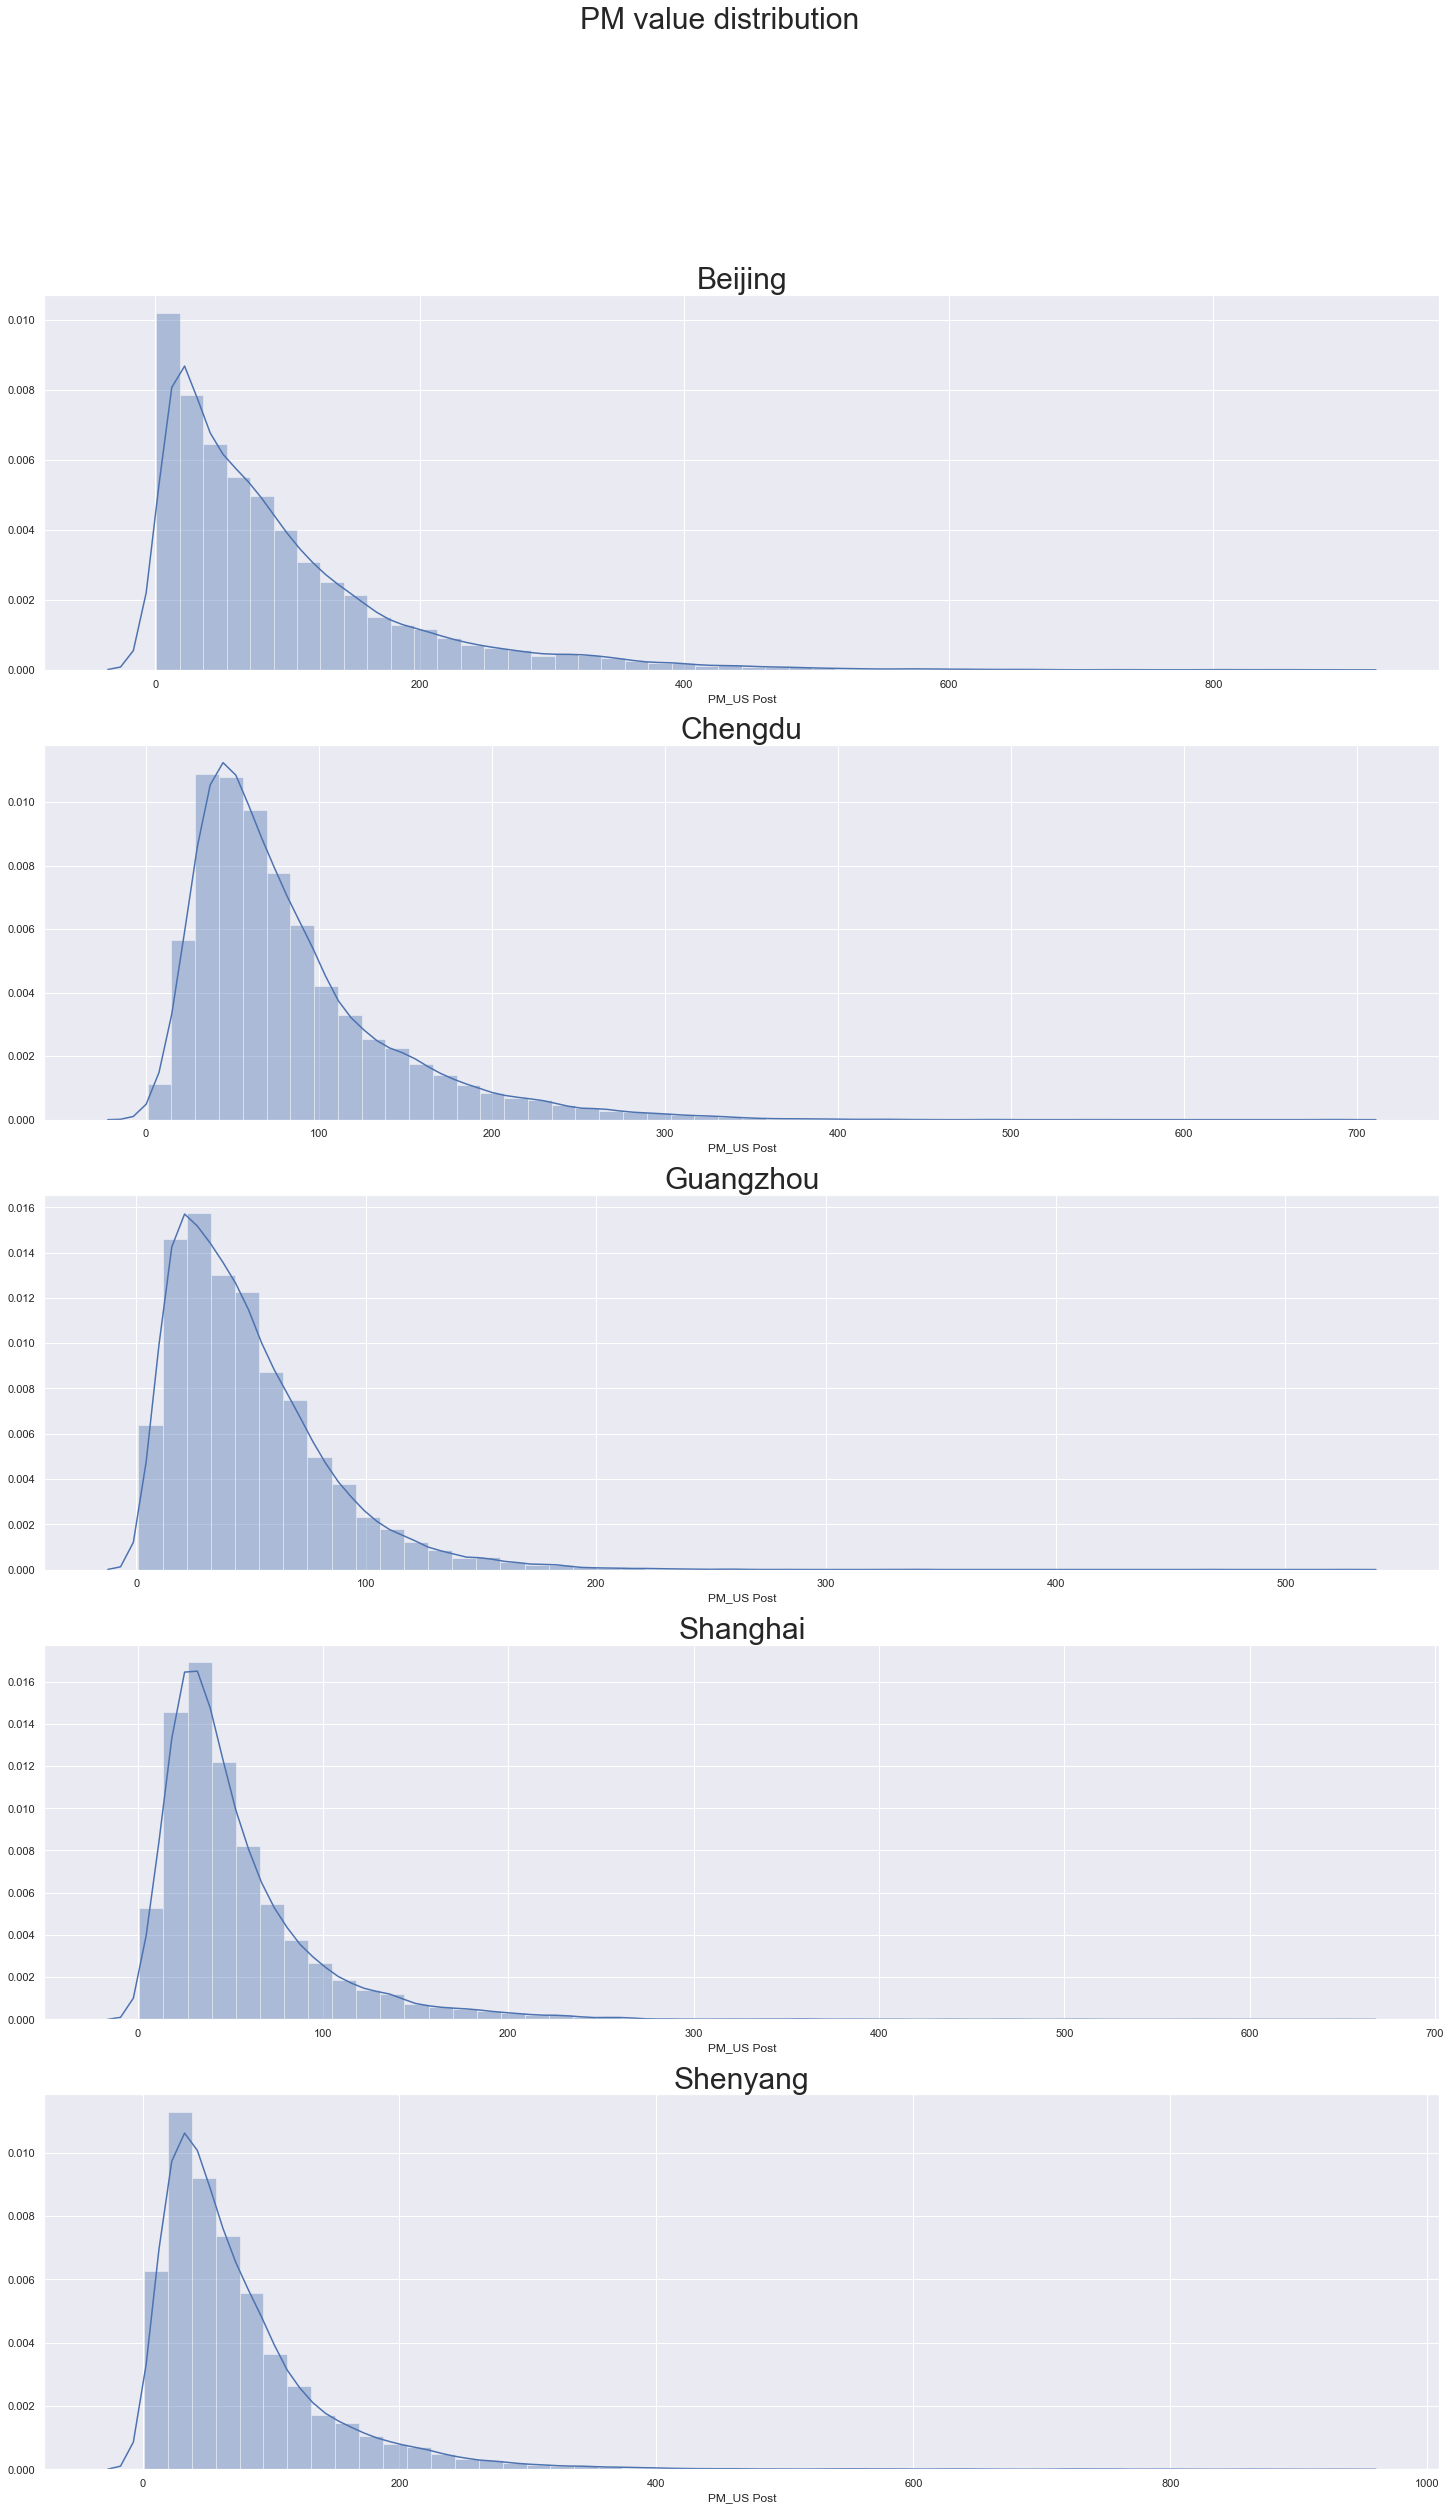

In [ ]:
data=[beijing,chengdu,guangzhou,shanghai,shenyang]
fig=plt.figure(figsize=[25,40])
for j,i in enumerate(data):
    ax=plt.subplot(5,1,j+1)
    sns.distplot(i['PM_US Post'])
    ax.set_title(cities[j],fontsize=(30))
fig.suptitle('PM value distribution',fontsize=30)

#### The data is piositively skewed

#### A collective forecasting model for all the cities cannot be built so building a model for a single city

### Since Beijing has the least number of missing values lets continue with it

In [ ]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2013-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PM_US Post     26280 non-null  float64
 1   DEWP           26280 non-null  float64
 2   HUMI           26280 non-null  float64
 3   PRES           26280 non-null  float64
 4   TEMP           26280 non-null  float64
 5   Iws            26280 non-null  float64
 6   precipitation  26280 non-null  float64
 7   Iprec          26280 non-null  float64
dtypes: float64(8)
memory usage: 1.8 MB


In [ ]:
import plotly.express as px
fig = px.line(beijing, x = "time", y = "PM_US Post", title = "Slider PM2.5")
fig.update_xaxes(
                rangeslider_visible = True,
                rangeselector = dict(
                     buttons = list([
                     dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
                     dict(count = 2, label = "2y", step = "year", stepmode = "backward"),
                     dict(count = 3, label = "3y", step = "year", stepmode = "backward"),
                     dict(step = "all")
                 ])   )
                    )

fig.show()

#### Plotting all columns 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fab3213a908>,
      dtype=object)

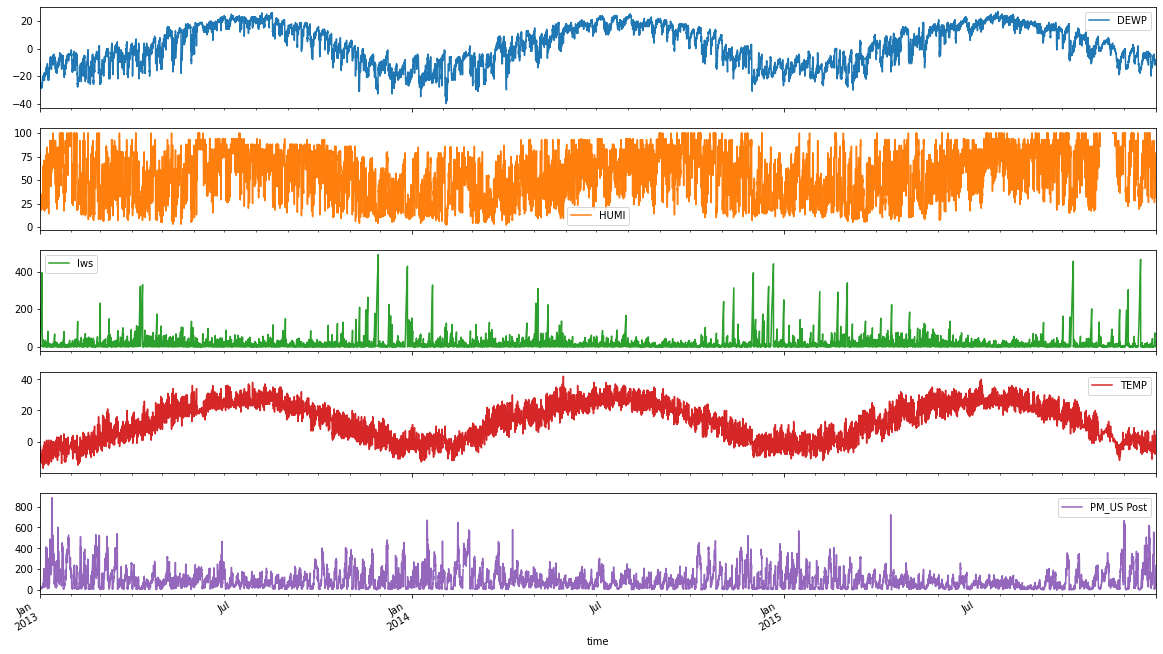

In [ ]:
beijing[["DEWP","HUMI","Iws","TEMP","PM_US Post"]].plot(subplots = True, figsize = (20,12))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(beijing["PM_US Post"])

ADF Test Statistic : -16.32407190204492
p-value : 3.1070612826968836e-29
#Lags Used : 49
Number of Observations Used : 26230
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


#### Only PM_US Post ,DEWP ,HUMI ,PRES ,TEMP  ,Iws ,precipitation and Iprec are the required features so rest can be dropped

In [ ]:
beijing=beijing[['PM_US Post','DEWP','HUMI','PRES','TEMP','Iws','precipitation','Iprec']]

In [ ]:
beijing.isna().sum()

PM_US Post       310
DEWP               5
HUMI             339
PRES             339
TEMP               5
Iws                5
precipitation    484
Iprec            484
dtype: int64

In [ ]:
bdf_pmna = beijing[~beijing["PM_US Post"].isnull()]

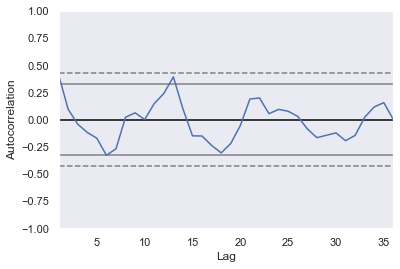

In [ ]:
pd.plotting.autocorrelation_plot(bdf_pmna[:]["PM_US Post"].resample("1m").mean())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


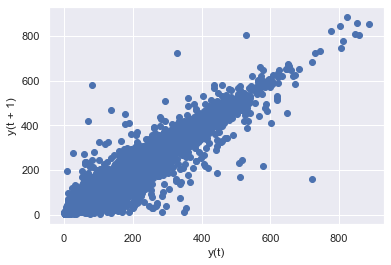

In [ ]:
pd.plotting.lag_plot(beijing["PM_US Post"],lag = 1)

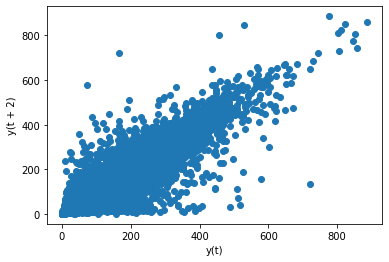

In [ ]:
pd.plotting.lag_plot(beijing["PM_US Post"],lag = 2)

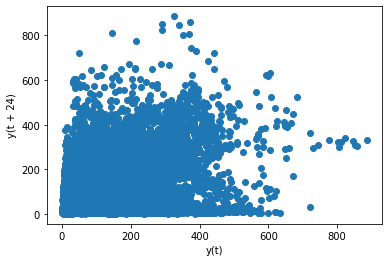

In [ ]:
pd.plotting.lag_plot(beijing["PM_US Post"],lag = 24)

#### we can see there is some linearity between 1 lag pm values while a day and a years pm values are pretty spread outsince we have <5% null values in PM2.5 we can impute the values from ffill

In [ ]:
beijing = beijing.fillna(method = "ffill") 

In [ ]:
beijing['EMA'] = round(beijing.iloc[:,6].ewm(span = 240).mean(), 2)
beijing['SMA'] = round(beijing.iloc[:,6].rolling(window = 24).mean(), 2)

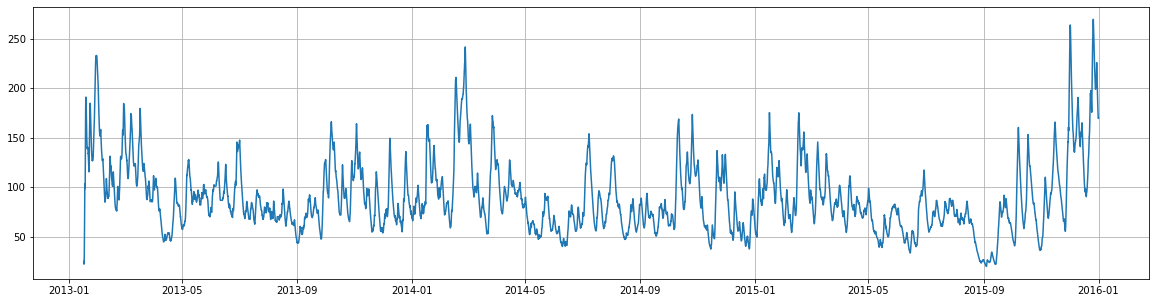

In [ ]:
plt.figure(figsize=[20,5])
plt.grid(True)
plt.plot(beijing['EMA'])

In [ ]:
shenyang['EMA'] = round(shenyang.iloc[:,6].ewm(span = 240).mean(), 2)
guangzhou['EMA'] = round(guangzhou.iloc[:,6].ewm(span = 240).mean(), 2)
shanghai['EMA'] = round(shanghai.iloc[:,6].ewm(span = 240).mean(), 2)
chengdu['EMA'] = round(chengdu.iloc[:,6].ewm(span = 240).mean(), 2)

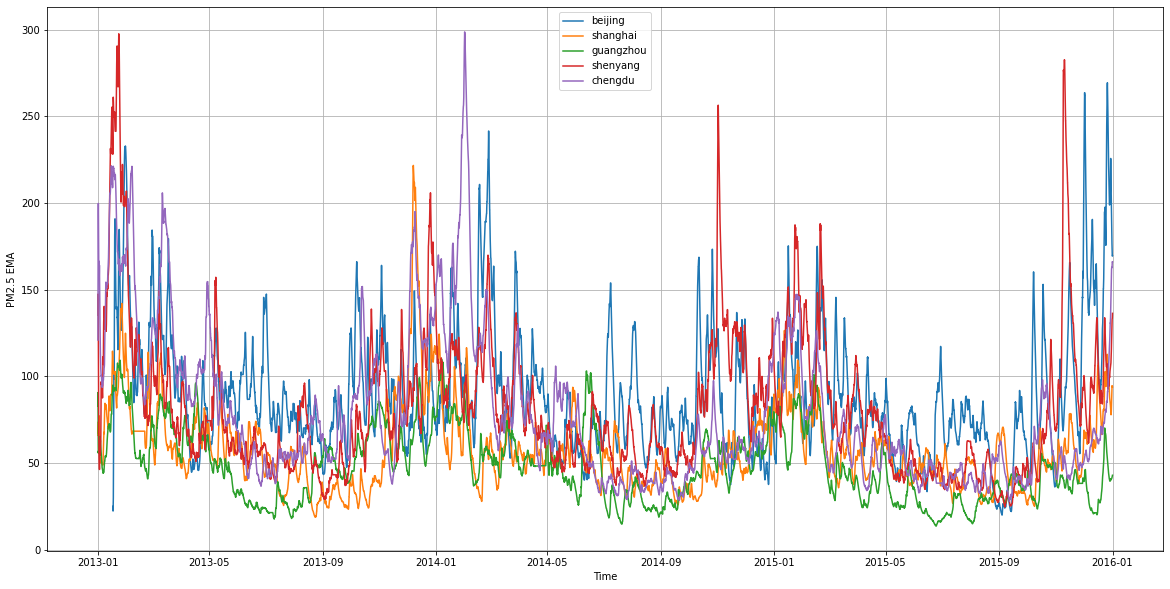

In [ ]:
plt.figure(figsize=[20,10])
plt.grid(True)
plt.plot(beijing['EMA'],label = "beijing")
plt.plot(shanghai['EMA'],label = "shanghai")
plt.plot(guangzhou['EMA'],label = "guangzhou")
plt.plot(shenyang['EMA'],label = "shenyang")
plt.plot(chengdu['EMA'],label = "chengdu")
plt.xlabel('Time')
plt.ylabel('PM2.5 EMA')
plt.legend()

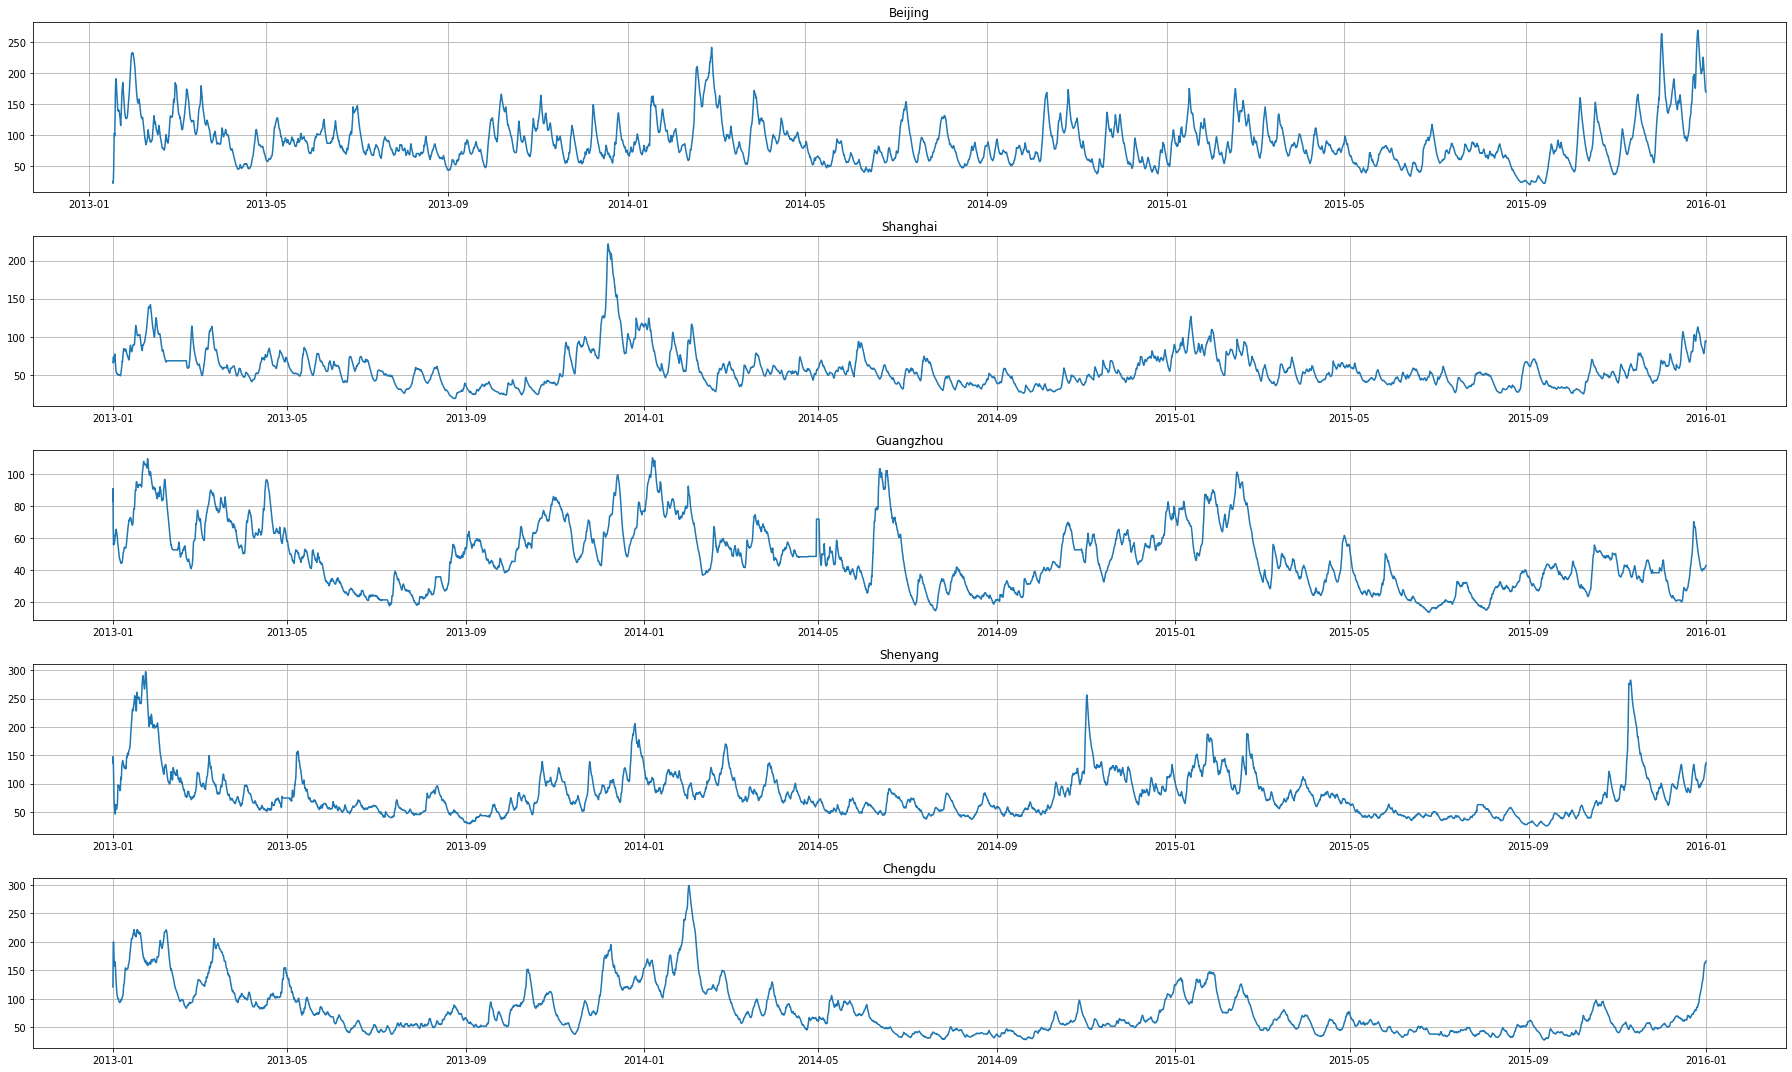

In [ ]:
fig = plt.figure(figsize=[25,15])
plt.subplot(511)
plt.title('Beijing')
plt.grid(True)
plt.plot(beijing['EMA'],label = "beijing")

plt.subplot(512)
plt.title('Shanghai')
plt.grid(True)
plt.plot(shanghai['EMA'],label = "shanghai")

plt.subplot(513)
plt.title('Guangzhou')
plt.grid(True)
plt.plot(guangzhou['EMA'],label = "guangzhou")

plt.subplot(514)
plt.title('Shenyang')
plt.grid(True)
plt.plot(shenyang['EMA'],label = "shenyang")

plt.subplot(515)
plt.title('Chengdu')
plt.grid(True)
plt.plot(chengdu['EMA'],label = "chengdu")

fig.tight_layout()
plt.show()

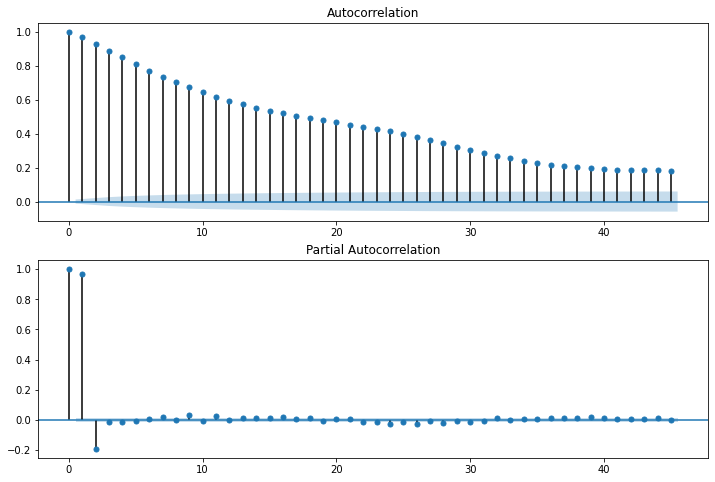

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(beijing['PM_US Post'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(beijing['PM_US Post'],ax=ax2)

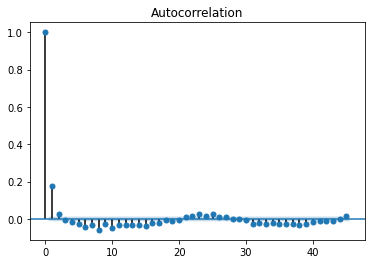

In [ ]:
bstationary = beijing["PM_US Post"].diff(periods = 1).dropna()
fig = plot_acf(bstationary)

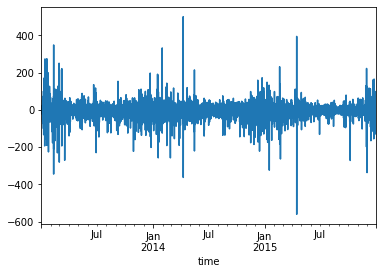

In [ ]:
bstationary.plot()

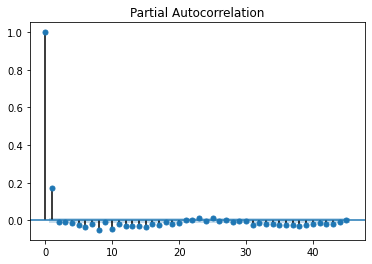

In [ ]:
fig  = plot_pacf(bstationary)

In [ ]:
import numpy as np
def createData(dataset,time_step):
    x,y=[],[]
    for i in range(len(dataset)-1-time_step):
        a=dataset[i:(i+time_step)]
        x.append(a)
        y.append(dataset[i+time_step,0])
    return np.array(x),np.array(y)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(beijing['PM_US Post'].values.reshape(-1,1))
x,y=createData(dataset,24*30)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20447, 720, 1) (5112, 720, 1) (20447,) (5112,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(720,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 720, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 720, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_t,x_val,y_t,y_val=train_test_split(x_train,y_train,test_size=0.2)
print(x_t.shape,x_val.shape,y_t.shape,y_val.shape)

(16357, 720, 1) (4090, 720, 1) (16357,) (4090,)


In [ ]:
history=model.fit(x_t,y_t,validation_data=(x_val,y_val),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
256/256 [==============================] - 21s 83ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 2/50
256/256 [==============================] - 20s 80ms/step - loss: 0.0011 - val_loss: 9.2511e-04
Epoch 3/50
256/256 [==============================] - 20s 80ms/step - loss: 7.8194e-04 - val_loss: 9.0941e-04
Epoch 4/50
256/256 [==============================] - 20s 80ms/step - loss: 7.1366e-04 - val_loss: 7.5151e-04
Epoch 5/50
256/256 [==============================] - 20s 80ms/step - loss: 6.7687e-04 - val_loss: 7.3196e-04
Epoch 6/50
256/256 [==============================] - 20s 80ms/step - loss: 6.6673e-04 - val_loss: 7.4708e-04
Epoch 7/50
256/256 [==============================] - 21s 80ms/step - loss: 6.6745e-04 - val_loss: 6.9716e-04
Epoch 8/50
256/256 [==============================] - 20s 80ms/step - loss: 6.5821e-04 - val_loss: 6.6288e-04
Epoch 9/50
256/256 [==============================] - 20s 79ms/step - loss: 6.4986e-04 - val_loss: 6.8534e-04
Epoch 10/50
256/256 [=

#### Plotting  loss and validation loss history

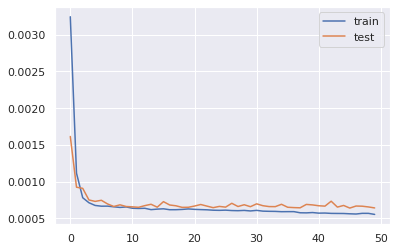

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#### Using the Test data to evaluate the model

In [ ]:
y_pred=model.predict(x_test)

#### Inverse scaling the original and predicted values for the Test data to compare them on the graph

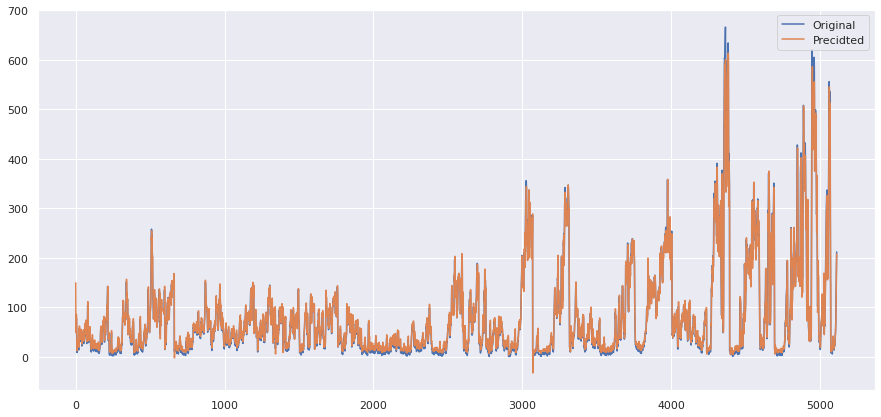

In [ ]:
y_inv=scaler.inverse_transform(y_test.reshape(-1,1))
y_invP=scaler.inverse_transform(y_pred.reshape(-1,1))
fig=plt.figure(figsize=(15,7))
plt.plot(y_inv,label='Original')
plt.plot(y_invP,label='Precidted')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_inv,y_invP))
mae=mean_absolute_error(y_inv,y_invP)
print('Root mean squared error : ',rmse)
print('Mean absolute error : ',mae)

Root mean squared error :  18.64638886120698
Mean absolute error :  10.536088199076332


In [ ]:
model.save('m.h5')

In [ ]:
y_pred=[]
x_f=x_test[0]

In [ ]:
y_pred=[]
for i in range(24*30):
    
        y_pred.append(m.predict(x_f.reshape(1,720,1)))
        l=list(x_f)
        l.pop(0)
        l.append((y_pred[i].reshape(1)))
        x_f=np.array(l)

NameError: ignored

In [ ]:
y_pred=np.array(y_pred)
y_pred=y_pred.reshape(720)
y_pred.shape

In [ ]:
fig=plt.figure(figsize=(12,7))
plt.plot(y_test[:721],label='Original')
plt.plot(y_pred,label='Precidted')
plt.legend()

In [ ]:
from keras.models import load_model

In [ ]:
m=load_model('m.h5')

In [ ]:
y_pred=[]
x_f=x_test[-1]

In [ ]:
for i in range(24):
    
        y_pred.append(m.predict(x_f.reshape(1,720,1)))
        l=list(x_f)
        l.pop(0)
        l.append((y_pred[i].reshape(1)))
        x_f=np.array(l)

In [ ]:
y_pred=np.array(y_pred)
y_pred=y_pred.reshape(24)
y_pred.shape

(24,)

In [ ]:
scaler.inverse_transform(y_pred.reshape(-1,1))

array([[207.76025 ],
       [204.79752 ],
       [195.74492 ],
       [184.41411 ],
       [173.53143 ],
       [164.25995 ],
       [156.51552 ],
       [149.74298 ],
       [143.52428 ],
       [137.80565 ],
       [132.81848 ],
       [128.88    ],
       [126.225266],
       [124.9374  ],
       [124.96384 ],
       [126.166   ],
       [128.3598  ],
       [131.33334 ],
       [134.84807 ],
       [138.63533 ],
       [142.39876 ],
       [145.82782 ],
       [148.62404 ],
       [150.53531 ]], dtype=float32)

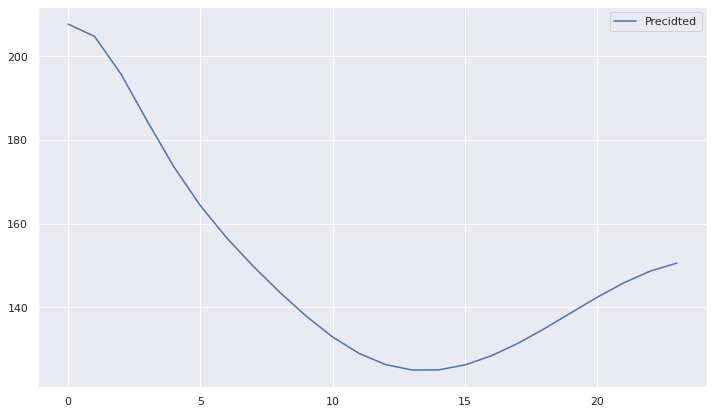

In [ ]:
fig=plt.figure(figsize=(12,7))
plt.plot(scaler.inverse_transform(y_pred.reshape(-1,1)),label='Precidted')
plt.legend()

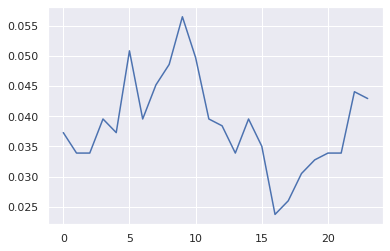

In [ ]:
x_input.shape

(1, 720)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
len(temp_input)

In [ ]:
lst_output=[]
n_steps=24*30
i=0
while i<720:
    if len(temp_input)>720:
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i+=1
    else:
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i+=1

In [ ]:
plt.plot(lst_output)

In [ ]:
x_f=x_test[1]

In [ ]:
y_f=model.predict(x_f.reshape(1,720,1))

In [ ]:
x_f